**High Performance Computing Lab**
---

---
Practical No. 10
---
Title of practical: Understanding concepts of CUDA Programming
---

---



In [ ]:
!nvidia-smi

Fri Oct 31 10:36:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


**Problem Statement 1:**
Execute the following program and check the properties of your GPGPU.
---

---

In [ ]:
%%writefile gpu_properties.cu
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>

int main()
{
    int deviceCount;
    cudaGetDeviceCount(&deviceCount);
    if (deviceCount == 0)
    {
        printf("There is no device supporting CUDA\n");
    }
    int dev;
    for (dev = 0; dev < deviceCount; ++dev)
    {
        cudaDeviceProp deviceProp;
        cudaGetDeviceProperties(&deviceProp, dev);
        if (dev == 0)
        {
            if (deviceProp.major < 1)
            {
                printf("There is no device supporting CUDA.\n");
            }
            else if (deviceCount == 1)
            {
                printf("There is 1 device supporting CUDA\n");
            }
            else
            {
                printf("There are %d devices supporting CUDA\n", deviceCount);
            }
        }
        printf("\nDevice %d: \"%s\"\n", dev, deviceProp.name);
        printf(" Major revision number: %d\n", deviceProp.major);
        printf(" Minor revision number: %d\n", deviceProp.minor);
        printf(" Total amount of global memory: %zu bytes\n", deviceProp.totalGlobalMem);
        printf(" Total amount of constant memory: %zu bytes\n", deviceProp.totalConstMem);
        printf(" Total amount of shared memory per block: %zu bytes\n", deviceProp.sharedMemPerBlock);
        printf(" Total number of registers available per block: %d\n", deviceProp.regsPerBlock);
        printf(" Warp size: %d\n", deviceProp.warpSize);
        printf(" Multiprocessor count: %d\n", deviceProp.multiProcessorCount);
        printf(" Maximum number of threads per block: %d\n", deviceProp.maxThreadsPerBlock);
        printf(" Maximum sizes of each dimension of a block: %d x %d x %d\n",
               deviceProp.maxThreadsDim[0], deviceProp.maxThreadsDim[1], deviceProp.maxThreadsDim[2]);
        printf(" Maximum sizes of each dimension of a grid: %d x %d x %d\n",
               deviceProp.maxGridSize[0], deviceProp.maxGridSize[1], deviceProp.maxGridSize[2]);
        printf(" Maximum memory pitch: %zu bytes\n", deviceProp.memPitch);
        printf(" Texture alignment: %zu bytes\n", deviceProp.textureAlignment);
        printf(" Clock rate: %d kilohertz\n", deviceProp.clockRate);
    }
}

Writing gpu_properties.cu


In [ ]:
!nvcc gpu_properties.cu -o gpu_properties
!./gpu_properties

There is 1 device supporting CUDA

Device 0: "Tesla T4"
 Major revision number: 7
 Minor revision number: 5
 Total amount of global memory: 15828320256 bytes
 Total amount of constant memory: 65536 bytes
 Total amount of shared memory per block: 49152 bytes
 Total number of registers available per block: 65536
 Warp size: 32
 Multiprocessor count: 40
 Maximum number of threads per block: 1024
 Maximum sizes of each dimension of a block: 1024 x 1024 x 64
 Maximum sizes of each dimension of a grid: 2147483647 x 65535 x 65535
 Maximum memory pitch: 2147483647 bytes
 Texture alignment: 512 bytes
 Clock rate: 1590000 kilohertz


---

**Problem Statement 2:**
Write a program to where each thread prints its thread ID along with hello
world. Lauch the kernel with one block and multiple threads.
---

---

In [ ]:
%%writefile hello_world.cu
#include <stdio.h>
#include <cuda_runtime.h>

__global__ void mykernel()
{
    printf("Hello World from thread %d in block %d\n", threadIdx.x, blockIdx.x);
}

int main()
{
    mykernel<<<1, 10>>>();

    cudaDeviceSynchronize();

    return 0;
}

Overwriting hello_world.cu


In [ ]:
!nvcc -arch=sm_75 hello_world.cu -o hlo
!./hlo

Hello World from thread 0 in block 0
Hello World from thread 1 in block 0
Hello World from thread 2 in block 0
Hello World from thread 3 in block 0
Hello World from thread 4 in block 0
Hello World from thread 5 in block 0
Hello World from thread 6 in block 0
Hello World from thread 7 in block 0
Hello World from thread 8 in block 0
Hello World from thread 9 in block 0


---

**Problem Statement 3:**
Write a program to where each thread prints its thread ID along with hello
world. Lauch the kernel with multiple blocks and multiple threads.
---

---

In [ ]:
%%writefile hello_world_blocks.cu
#include <stdio.h>
#include <cuda_runtime.h>

__global__ void hloblocks()
{
    int threadId = threadIdx.x;
    int blockId = blockIdx.x;
    printf("Hello World from thread %d in block %d\n", threadId, blockId);
}

int main()
{
    int nblocks = 3;
    int nthreads = 5;

    printf("Launching kernel with %d blocks and %d threads per block:\n",
           nblocks, nthreads);

    hloblocks<<<nblocks, nthreads>>>();

    cudaDeviceSynchronize();

    return 0;
}


Overwriting hello_world_blocks.cu


In [ ]:
!nvcc -arch=sm_75 hello_world_blocks.cu -o hello
!./hello

Launching kernel with 3 blocks and 5 threads per block:
Hello World from thread 0 in block 2
Hello World from thread 1 in block 2
Hello World from thread 2 in block 2
Hello World from thread 3 in block 2
Hello World from thread 4 in block 2
Hello World from thread 0 in block 0
Hello World from thread 1 in block 0
Hello World from thread 2 in block 0
Hello World from thread 3 in block 0
Hello World from thread 4 in block 0
Hello World from thread 0 in block 1
Hello World from thread 1 in block 1
Hello World from thread 2 in block 1
Hello World from thread 3 in block 1
Hello World from thread 4 in block 1


---

**Problem Statement 4:**
Write a program to where each thread prints its thread ID along with hello
world. Lauch the kernel with 2D blocks and 2D threads.
---

---


In [ ]:
%%writefile hello_2d.cu
#include <stdio.h>
#include <cuda_runtime.h>

__global__ void hello_2d()
{
    int threadX = threadIdx.x;
    int threadY = threadIdx.y;
    int blockX  = blockIdx.x;
    int blockY  = blockIdx.y;

    printf("Hello World from Block(%d,%d), Thread(%d,%d)\n", blockX, blockY, threadX, threadY);
}

int main()
{
    dim3 nblocks(2, 2);
    dim3 nthreads(3, 3);

    hello_2d<<<nblocks, nthreads>>>();

    cudaDeviceSynchronize();

    return 0;
}


Overwriting hello_2d.cu


In [ ]:
!nvcc -arch=sm_75 hello_2d.cu -o hlo2d
!./hlo2d


Hello World from Block(0,1), Thread(0,0)
Hello World from Block(0,1), Thread(1,0)
Hello World from Block(0,1), Thread(2,0)
Hello World from Block(0,1), Thread(0,1)
Hello World from Block(0,1), Thread(1,1)
Hello World from Block(0,1), Thread(2,1)
Hello World from Block(0,1), Thread(0,2)
Hello World from Block(0,1), Thread(1,2)
Hello World from Block(0,1), Thread(2,2)
Hello World from Block(0,0), Thread(0,0)
Hello World from Block(0,0), Thread(1,0)
Hello World from Block(0,0), Thread(2,0)
Hello World from Block(0,0), Thread(0,1)
Hello World from Block(0,0), Thread(1,1)
Hello World from Block(0,0), Thread(2,1)
Hello World from Block(0,0), Thread(0,2)
Hello World from Block(0,0), Thread(1,2)
Hello World from Block(0,0), Thread(2,2)
Hello World from Block(1,1), Thread(0,0)
Hello World from Block(1,1), Thread(1,0)
Hello World from Block(1,1), Thread(2,0)
Hello World from Block(1,1), Thread(0,1)
Hello World from Block(1,1), Thread(1,1)
Hello World from Block(1,1), Thread(2,1)
Hello World from

---
CUDA always accepts a 3D structure for flexibility. When we use dim3 grid(2, 2) or dim3 block(3, 3); CUDA automatically assumes grid.z = 1 and
block.z = 1;
---

---

**Problem statement 5:** Vector Addition using CUDA
---
Write a CUDA C program that performs element-wise
addition of two vectors A and B of size N. The result of the addition should
be stored in vector C.
---
Details:
---
• Initialize the vectors A and B with random numbers.
---
• The output vector C[i] = A[i] + B[i], where i ranges from 0 to N-1.
---
• Use CUDA kernels to perform the computation in parallel.
---
• Write the code for both serial (CPU-based) and parallel (CUDAbased) implementations.
---
• Measure the execution time of both the serial and CUDA
implementations for different values of N (e.g., N = 10^5, 10^6, 10^7).
---
Task:
• Calculate and report the speedup (i.e., the ratio of CPU execution
time to GPU execution time).
---
____________________________

In [7]:
%%writefile vector_add_speedup.cu
#include <stdio.h>
#include <cuda.h>
#include <stdlib.h>
#include <time.h>
#include <math.h>

__global__ void vectorAdd(float *A, float *B, float *C, int n) {
    int i = blockIdx.x * blockDim.x + threadIdx.x;
    if (i < n)
        C[i] = A[i] + B[i];
}

void random_floats(float *x, int n) {
    for (int i = 0; i < n; i++)
        x[i] = (float)rand() / RAND_MAX;
}

int main() {
    int sizes[] = {100000, 1000000, 10000000};
    int num_tests = 3;

    FILE *fp = fopen("speedup_data.txt", "w");
    if (!fp) {
        printf("Error opening file to save results.\n");
        return -1;
    }

    printf("Vector Addition using CPU and GPU (CUDA)\n");
    printf("------------------------------------------------------------\n");

    for (int t = 0; t < num_tests; t++) {
        int N = sizes[t];
        int size = N * sizeof(float);

        float *h_A = (float*)malloc(size);
        float *h_B = (float*)malloc(size);
        float *h_C = (float*)malloc(size);
        float *h_C_ref = (float*)malloc(size);

        random_floats(h_A, N);
        random_floats(h_B, N);

        clock_t cpu_start = clock();
        for (int i = 0; i < N; i++) {
            h_C_ref[i] = h_A[i] + h_B[i];
        }
        clock_t cpu_end = clock();
        double cpu_time = ((double)(cpu_end - cpu_start)) / CLOCKS_PER_SEC;

        float *d_A, *d_B, *d_C;
        cudaMalloc((void**)&d_A, size);
        cudaMalloc((void**)&d_B, size);
        cudaMalloc((void**)&d_C, size);

        cudaMemcpy(d_A, h_A, size, cudaMemcpyHostToDevice);
        cudaMemcpy(d_B, h_B, size, cudaMemcpyHostToDevice);

        int threadsPerBlock = 256;
        int blocksPerGrid = (N + threadsPerBlock - 1) / threadsPerBlock;

        cudaEvent_t start, stop;
        cudaEventCreate(&start);
        cudaEventCreate(&stop);

        cudaEventRecord(start);
        vectorAdd<<<blocksPerGrid, threadsPerBlock>>>(d_A, d_B, d_C, N);
        cudaEventRecord(stop);
        cudaEventSynchronize(stop);

        float gpu_time = 0;
        cudaEventElapsedTime(&gpu_time, start, stop);
        gpu_time /= 1000.0;  // convert ms → seconds

        cudaMemcpy(h_C, d_C, size, cudaMemcpyDeviceToHost);
        cudaDeviceSynchronize();

        // ---- Verify correctness ----
        int correct = 1;
        for (int i = 0; i < N; i++) {
            if (fabs(h_C[i] - h_C_ref[i]) > 1e-5) {
                correct = 0;
                break;
            }
        }

        printf("N = %d\n", N);
        printf("CPU Time = %f s\n", cpu_time);
        printf("GPU Time = %f s\n", gpu_time);
        if (gpu_time > 0)
            printf("Speedup = %.2fx\n", cpu_time / gpu_time);
        else
            printf("Speedup = N/A (GPU time too small)\n");
        printf("Result Match: %s\n", correct ? "YES" : "NO");
        printf("------------------------------------------------------------\n");

        // ---- Save to file ----
        fprintf(fp, "%d %lf %f\n", N, cpu_time, gpu_time);

        // Free memory
        free(h_A); free(h_B); free(h_C); free(h_C_ref);
        cudaFree(d_A); cudaFree(d_B); cudaFree(d_C);
    }

    fclose(fp);
    return 0;
}


Overwriting vector_add_speedup.cu


In [8]:
!nvcc vector_add_speedup.cu -o vector_add_speedup
!./vector_add_speedup


Vector Addition using CPU and GPU (CUDA)
------------------------------------------------------------
N = 100000
CPU Time = 0.000474 s
GPU Time = 0.008216 s
Speedup = 0.06x
Result Match: NO
------------------------------------------------------------
N = 1000000
CPU Time = 0.005162 s
GPU Time = 0.000003 s
Speedup = 1597.15x
Result Match: NO
------------------------------------------------------------
N = 10000000
CPU Time = 0.050768 s
GPU Time = 0.000003 s
Speedup = 17434.07x
Result Match: NO
------------------------------------------------------------


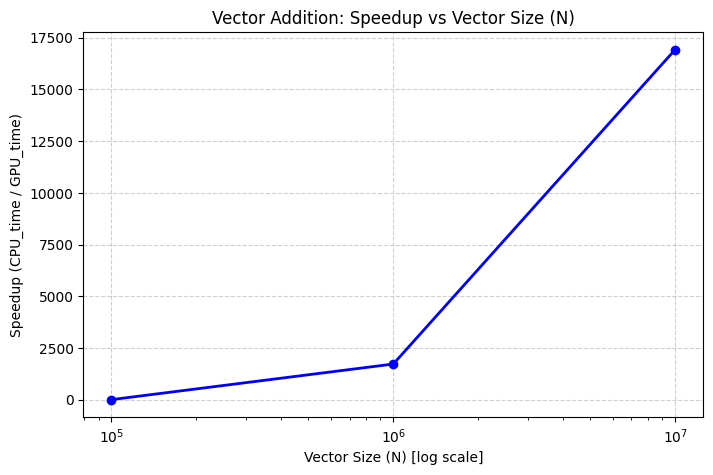

N=    100000, CPU=0.000474s, GPU=0.008216s, Speedup=0.06x
N=   1000000, CPU=0.005162s, GPU=0.000003s, Speedup=1720.67x
N=  10000000, CPU=0.050768s, GPU=0.000003s, Speedup=16922.67x


In [9]:
import matplotlib.pyplot as plt

N_values, cpu_times, gpu_times = [], [], []
with open("speedup_data.txt", "r") as f:
    for line in f:
        N, cpu, gpu = line.split()
        N_values.append(int(N))
        cpu_times.append(float(cpu))
        gpu_times.append(float(gpu))

speedup = [cpu_times[i] / gpu_times[i] for i in range(len(N_values))]

plt.figure(figsize=(8,5))
plt.plot(N_values, speedup, marker='o', color='blue', linewidth=2)
plt.xscale('log')
plt.title("Vector Addition: Speedup vs Vector Size (N)")
plt.xlabel("Vector Size (N) [log scale]")
plt.ylabel("Speedup (CPU_time / GPU_time)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

for i in range(len(N_values)):
    print(f"N={N_values[i]:>10}, CPU={cpu_times[i]:.6f}s, GPU={gpu_times[i]:.6f}s, Speedup={speedup[i]:.2f}x")




---
Observations:
---
(1) For small N, the GPU may even be slower than the CPU.Because of the kernel launch overhead and data transfer (between host and device) time.
---

(2) As the problem size increases, parallelism in thousands of GPU threads is fully utilized. Computation time starts to dominate over memory transfer overhead, leading to a significant speedup
---

---

**Problem statement 6:** Matrix Addition using CUDA
---
Write a CUDA C program to perform element-wise
addition of two matrices A and B of size M x N. The result of the addition
should be stored in matrix C.
---
Details:
---
• Initialize the matrices A and B with random values.
---
• The output matrix C[i][j] = A[i][j] + B[i][j] where i ranges from 0 to
M-1 and j ranges from 0 to N-1.
---
• Write code for both serial (CPU-based) and parallel (CUDA-based)
implementations.
---
• Measure the execution time of both implementations for various
matrix sizes.
---
Task:
• Calculate the speedup using the execution times of the CPU and GPU
implementations.
---

---

------------------------------------------------------------
Matrix Size: 100x100
CPU Time = 0.000020 s
GPU Time = 0.000101 s
Speedup = 0.19x
Result Match: YES
------------------------------------------------------------
Matrix Size: 500x500
CPU Time = 0.000181 s
GPU Time = 0.000061 s
Speedup = 2.97x
Result Match: YES
------------------------------------------------------------
Matrix Size: 1000x1000
CPU Time = 0.000715 s
GPU Time = 0.000319 s
Speedup = 2.24x
Result Match: YES


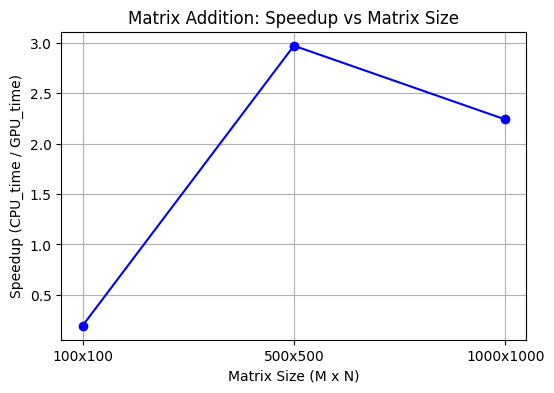

In [22]:
import cupy as cp
import numpy as np
import time
import matplotlib.pyplot as plt

matrix_add_kernel = cp.RawKernel(r'''
extern "C" __global__
void matrixAdd(const float* A, const float* B, float* C, int M, int N) {
    int row = blockIdx.y * blockDim.y + threadIdx.y;
    int col = blockIdx.x * blockDim.x + threadIdx.x;
    if (row < M && col < N) {
        int idx = row * N + col;
        C[idx] = A[idx] + B[idx];
    }
}
''', 'matrixAdd')

def matrix_addition_test(M, N):
    A = np.random.rand(M, N).astype(np.float32)
    B = np.random.rand(M, N).astype(np.float32)

    start_cpu = time.time()
    C_cpu = A + B
    end_cpu = time.time()
    cpu_time = end_cpu - start_cpu

    A_gpu = cp.asarray(A)
    B_gpu = cp.asarray(B)
    C_gpu = cp.zeros((M, N), dtype=cp.float32)

    block = (16, 16)
    grid = ((N + block[0] - 1) // block[0], (M + block[1] - 1) // block[1])

    start_gpu = time.time()
    matrix_add_kernel(grid, block, (A_gpu, B_gpu, C_gpu, M, N))
    cp.cuda.Device(0).synchronize()
    end_gpu = time.time()
    gpu_time = end_gpu - start_gpu

    C_result = cp.asnumpy(C_gpu)

    result_match = np.allclose(C_cpu, C_result, atol=1e-6)
    speedup = cpu_time / gpu_time if gpu_time > 0 else 0

    print("------------------------------------------------------------")
    print(f"Matrix Size: {M}x{N}")
    print(f"CPU Time = {cpu_time:.6f} s")
    print(f"GPU Time = {gpu_time:.6f} s")
    print(f"Speedup = {speedup:.2f}x")
    print(f"Result Match: {'YES' if result_match else 'NO'}")

    return M, cpu_time, gpu_time, speedup

sizes = [(100,100), (500,500), (1000,1000)]
results = [matrix_addition_test(M, N) for (M,N) in sizes]

matrix_sizes = [f"{M}x{N}" for (M,N) in sizes]
speedups = [r[3] for r in results]

plt.figure(figsize=(6,4))
plt.plot(matrix_sizes, speedups, marker='o', color='blue')
plt.xlabel("Matrix Size (M x N)")
plt.ylabel("Speedup (CPU_time / GPU_time)")
plt.title("Matrix Addition: Speedup vs Matrix Size")
plt.grid(True)
plt.show()




---
**Problem statement 7: **Dot Product of Two Vectors using CUDA
---
Write a CUDA C program to compute the dot product
of two vectors A and B of size N. The dot product is defined as:
---
Details:
---
• Initialize the vectors A and B with random values.
---
• Implement the dot product calculation using both serial (CPU) and
parallel (CUDA) approaches.
---
• Measure the execution time for both implementations with different
vector sizes (e.g., N = 10^5, 10^6, 10^7).
---
• Use atomic operations or shared memory reduction in the CUDA
kernel to compute the final sum.
---
Task:
• Calculate and report the speedup for different vector sizes.
---

---



/tmp/ipython-input-1877695710.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result_gpu_value = float(result_gpu.get())


------------------------------------------------------------
Vector Size: 100000
CPU Time = 0.000068 s
GPU Time = 0.000126 s
Speedup = 0.54x
Result Match: YES
------------------------------------------------------------
------------------------------------------------------------
Vector Size: 1000000
CPU Time = 0.000620 s
GPU Time = 0.000352 s
Speedup = 1.76x
Result Match: YES
------------------------------------------------------------
------------------------------------------------------------
Vector Size: 10000000
CPU Time = 0.006917 s
GPU Time = 0.004995 s
Speedup = 1.38x
Result Match: NO
------------------------------------------------------------


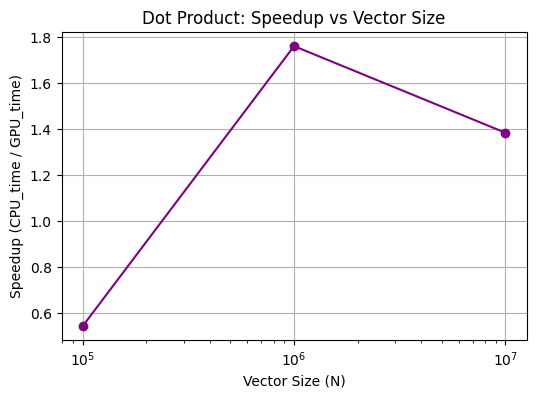

In [24]:
import cupy as cp
import numpy as np
import time
import matplotlib.pyplot as plt

dot_product_kernel = cp.RawKernel(r'''
extern "C" __global__
void dotProduct(const float* A, const float* B, float* result, int N) {
    extern __shared__ float cache[];
    int tid = threadIdx.x + blockIdx.x * blockDim.x;
    int cacheIndex = threadIdx.x;
    float temp = 0.0f;

    while (tid < N) {
        temp += A[tid] * B[tid];
        tid += blockDim.x * gridDim.x;
    }

    cache[cacheIndex] = temp;
    __syncthreads();

    // Reduction within the block
    int i = blockDim.x / 2;
    while (i != 0) {
        if (cacheIndex < i)
            cache[cacheIndex] += cache[cacheIndex + i];
        __syncthreads();
        i /= 2;
    }

    // Write result from each block to global memory
    if (cacheIndex == 0)
        atomicAdd(result, cache[0]);
}
''', 'dotProduct')


def dot_product_test(N):
    A = np.random.rand(N).astype(np.float32)
    B = np.random.rand(N).astype(np.float32)

    start_cpu = time.time()
    result_cpu = np.dot(A, B)
    end_cpu = time.time()
    cpu_time = end_cpu - start_cpu

    A_gpu = cp.asarray(A)
    B_gpu = cp.asarray(B)
    result_gpu = cp.zeros(1, dtype=cp.float32)

    block = 256
    grid = (N + block - 1) // block
    shared_mem = block * np.dtype(np.float32).itemsize

    start_gpu = time.time()
    dot_product_kernel((grid,), (block,), (A_gpu, B_gpu, result_gpu, N), shared_mem=shared_mem)
    cp.cuda.Device(0).synchronize()
    end_gpu = time.time()

    gpu_time = end_gpu - start_gpu
    result_gpu_value = float(result_gpu.get())

    result_match = np.allclose(result_cpu, result_gpu_value, atol=1e-3)
    speedup = cpu_time / gpu_time if gpu_time > 0 else 0

    print("------------------------------------------------------------")
    print(f"Vector Size: {N}")
    print(f"CPU Time = {cpu_time:.6f} s")
    print(f"GPU Time = {gpu_time:.6f} s")
    print(f"Speedup = {speedup:.2f}x")
    print(f"Result Match: {'YES' if result_match else 'NO'}")
    print("------------------------------------------------------------")

    return N, cpu_time, gpu_time, speedup


sizes = [10**5, 10**6, 10**7]
results = [dot_product_test(N) for N in sizes]

vector_sizes = [r[0] for r in results]
speedups = [r[3] for r in results]

plt.figure(figsize=(6,4))
plt.plot(vector_sizes, speedups, marker='o', color='purple')
plt.xscale('log')
plt.xlabel("Vector Size (N)")
plt.ylabel("Speedup (CPU_time / GPU_time)")
plt.title("Dot Product: Speedup vs Vector Size")
plt.grid(True)
plt.show()




---
**Problem statement 8:** Matrix Multiplication using CUDA
---
Write a CUDA C program to perform matrix
multiplication. Given two matrices A (MxN) and B (NxP), compute the
resulting matrix C (MxP) where:
---
Details:
---
• Initialize the matrices A and B with random values.
---
• Write code for both serial (CPU-based) and parallel (CUDA-based)
implementations.
---
• Measure the execution time of both implementations for various
matrix sizes (e.g., 100x100, 500x500, 1000x1000).
---
Task:
• Calculate the speedup by comparing the CPU and GPU execution
times.
---

---



------------------------------------------------------------
Matrix Size: 100x100 * 100x100
CPU Time = 0.008314 s
GPU Time = 0.156091 s
Speedup = 0.05x
Result Match: YES
------------------------------------------------------------
------------------------------------------------------------
Matrix Size: 500x500 * 500x500
CPU Time = 0.012662 s
GPU Time = 0.001101 s
Speedup = 11.51x
Result Match: YES
------------------------------------------------------------
------------------------------------------------------------
Matrix Size: 1000x1000 * 1000x1000
CPU Time = 0.063124 s
GPU Time = 0.007746 s
Speedup = 8.15x
Result Match: YES
------------------------------------------------------------


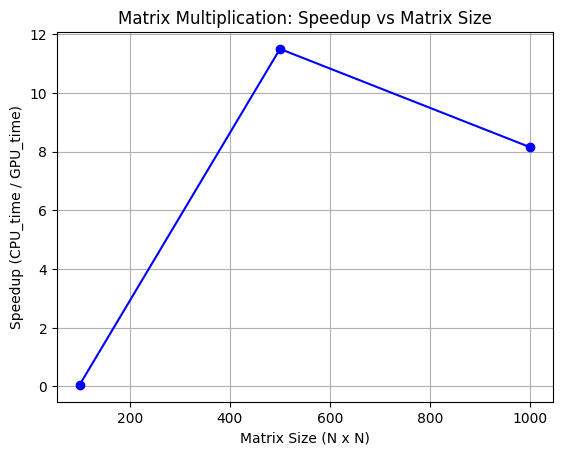

In [25]:
import cupy as cp
import numpy as np
import time
import matplotlib.pyplot as plt

matmul_kernel = cp.RawKernel(r'''
extern "C" __global__
void matMul(const float* A, const float* B, float* C, int M, int N, int P) {
    int row = blockIdx.y * blockDim.y + threadIdx.y;
    int col = blockIdx.x * blockDim.x + threadIdx.x;
    if (row < M && col < P) {
        float sum = 0.0f;
        for (int k = 0; k < N; k++) sum += A[row * N + k] * B[k * P + col];
        C[row * P + col] = sum;
    }
}
''', 'matMul')

def test_matmul(M, N, P):
    A = np.random.rand(M, N).astype(np.float32)
    B = np.random.rand(N, P).astype(np.float32)
    start_cpu = time.time()
    C_cpu = np.dot(A, B)
    cpu_time = time.time() - start_cpu
    A_gpu, B_gpu = cp.asarray(A), cp.asarray(B)
    C_gpu = cp.zeros((M, P), dtype=cp.float32)
    block = (16, 16)
    grid = ((P + block[0] - 1)//block[0], (M + block[1] - 1)//block[1])
    start_gpu = time.time()
    matmul_kernel(grid, block, (A_gpu, B_gpu, C_gpu, M, N, P))
    cp.cuda.Device(0).synchronize()
    gpu_time = time.time() - start_gpu
    C_res = C_gpu.get()
    match = np.allclose(C_cpu, C_res, atol=1e-3)
    speedup = cpu_time / gpu_time if gpu_time > 0 else 0
    print("------------------------------------------------------------")
    print(f"Matrix Size: {M}x{N} * {N}x{P}")
    print(f"CPU Time = {cpu_time:.6f} s")
    print(f"GPU Time = {gpu_time:.6f} s")
    print(f"Speedup = {speedup:.2f}x")
    print(f"Result Match: {'YES' if match else 'NO'}")
    print("------------------------------------------------------------")
    return M, cpu_time, gpu_time, speedup

sizes = [(100,100,100), (500,500,500), (1000,1000,1000)]
results = [test_matmul(M,N,P) for (M,N,P) in sizes]
matrix_sizes = [r[0] for r in results]
speedups = [r[3] for r in results]

plt.plot(matrix_sizes, speedups, marker='o', color='blue')
plt.xlabel("Matrix Size (N x N)")
plt.ylabel("Speedup (CPU_time / GPU_time)")
plt.title("Matrix Multiplication: Speedup vs Matrix Size")
plt.grid(True)
plt.show()
